<h1> Analysis on Credit Card Default </h1>
<h2> About Data </h2>

The Default of Credit Card Clients Dataset is sourced from the UCI Machine Learning Repository. It provides information on default payments, demographic factors, credit data, payment history, and billing statements of credit card clients in Taiwan from April 2005 to September 2005.

**Dataset Details:**

- Number of Instances (Rows): 30,000
- Number of Variables (Columns): 25

**Target Variable:**

The target variable (label) is the 'default payment next month' column, which indicates whether a client will default on their payment next month. It is encoded as follows:
- 1: Default payment next month (Yes)
- 0: No default payment next month (No)

**Features (Independent Variables):**

The remaining columns in the dataset are features, which include:

- `ID`: ID of each client
- `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- `SEX`: Gender (1 = male, 2 = female)
- `EDUCATION`: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others)
- `MARRIAGE`: Marital status (1 = married, 2 = single, 3 = others)
- `AGE`: Age in years
- `PAY_0`, `PAY_2` - `PAY_6`: Repayment status in September 2005, August 2005, ..., April 2005 (scale: -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ..., 8 = payment delay for eight months, 9 = payment delay for nine months and above)
- `BILL_AMT1` - `BILL_AMT6`: Amount of bill statement in September 2005, August 2005, ..., April 2005 (NT dollar)
- `PAY_AMT1` - `PAY_AMT6`: Amount of previous payment in September 2005, August 2005, ..., April 2005 (NT dollar)


<h2> Data Retrieval and Preprocessing </h2>


In [1]:
# import data
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
data = pd.read_excel(url,header=1)
cc = data.copy()
cc = cc.drop(['ID'],axis=1)
cc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
y = cc['default payment next month']
X = cc.drop(['default payment next month'], axis=1)

In [3]:
#pertubate data 

import numpy as np

np.random.seed(1992)
noise = np.random.normal(0, 1, X.shape)
X_perturbed = X + noise
X_perturbed.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,19999.764837,3.078820,1.573994,1.226979,25.355065,3.091244,2.330408,1.190902,-1.223310,-1.551322,...,688.277507,-1.901867,-0.871000,-0.327478,2.880395,689.593235,-0.430066,-0.203135,-0.241548,0.228578
1,120000.539409,2.036679,2.530178,1.737043,26.917942,-0.818469,1.841601,-1.774385,-0.945756,-0.559102,...,2681.371854,3272.375855,3455.239218,3261.197808,-1.241448,999.868616,1000.982549,999.984840,-1.180752,2001.259424
2,89998.706197,1.707039,0.245267,2.764420,31.704897,2.460652,0.009003,0.896342,1.473940,1.171253,...,13559.301246,14332.907388,14948.052325,15549.054446,1517.633396,1499.626756,1000.451516,1001.430434,998.972048,4999.544676
3,49999.503182,1.000606,1.739712,-1.136602,36.080728,0.992506,0.374069,-0.671272,-2.018546,0.706513,...,49291.638804,28315.042186,28958.406604,29548.149135,1998.313568,2020.431728,1199.497850,1100.399551,1069.858761,998.437948
4,50000.413875,1.429502,2.389036,0.437236,56.301169,1.248528,0.461247,-0.332519,-0.356791,-0.908324,...,35832.844840,20938.130623,19144.698725,19131.440467,1999.179897,36681.335817,10000.183982,9000.314732,690.035701,679.152289


<h2> PCA </h2>

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_p_std = scaler.fit_transform(X_perturbed)

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_p_std)

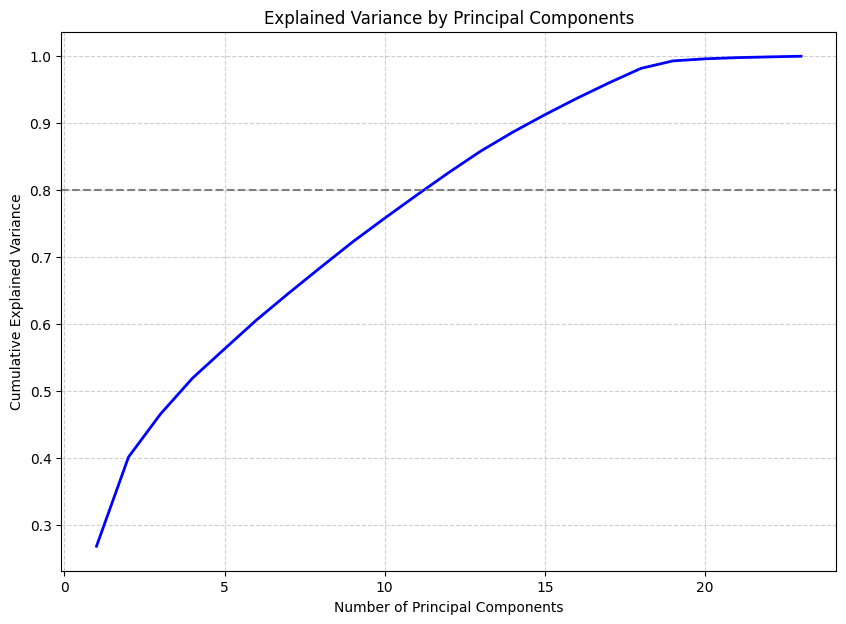

'"\nComment on graph:\n\nThe graph showing cumulative explained variance by principal components is rather smooth until around 19 principal components which is starts to plateau.\nSince graph is smooth, it is not straightforward to select the number of principal components to use to maximise variance explained while using less principal components.\nHere, using a percentage to guide our selection would be more helpful than through a visual selection.\n\n'

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(),lw=2, color='blue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.8, color='grey', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show();

""""
Comment on graph:

The graph showing cumulative explained variance by principal components is rather smooth until around 19 principal components which is starts to plateau.
Since graph is smooth, it is not straightforward to select the number of principal components to use to maximise variance explained while using less principal components.
Here, using a percentage to guide our selection would be more helpful than through a visual selection.

"""

In [7]:
count = 0
for i in pca.explained_variance_ratio_.cumsum():
    count +=1
    if i >= 0.8:
        print(f'Number of principal components to keep: {count}') 
        break

Number of principal components to keep: 12


In [8]:
pca = PCA(n_components=12)
X_pca_12 = pca.fit_transform(X_p_std)

<h2> Neural Network Classfication without PCA </h2>


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_perturbed, y, test_size=0.30, random_state=1992)

from tensorflow import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping


model = keras.Sequential([
    layers.Dense(256, activation='relu',input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[early_stop], verbose=1)

2023-08-14 15:53:00.171137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
329/329 [==============================] - 2s 3ms/step - loss: 808.7281 - accuracy: 0.6737 - val_loss: 1.5207 - val_accuracy: 0.7540
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 15.3563 - accuracy: 0.6743 - val_loss: 0.7162 - val_accuracy: 0.5738
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 4.2340 - accuracy: 0.7476 - val_loss: 0.5988 - val_accuracy: 0.7823
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 1.6671 - accuracy: 0.7615 - val_loss: 0.5560 - val_accuracy: 0.7823
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 1.6130 - accuracy: 0.7703 - val_loss: 0.5367 - val_accuracy: 0.7823
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 1.4159 - accuracy: 0.7737 - val_loss: 0.5291 - val_accuracy: 0.7823
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 1.4013 - accuracy: 0.7743 - val_loss: 0.5260 - val_accuracy: 0.7

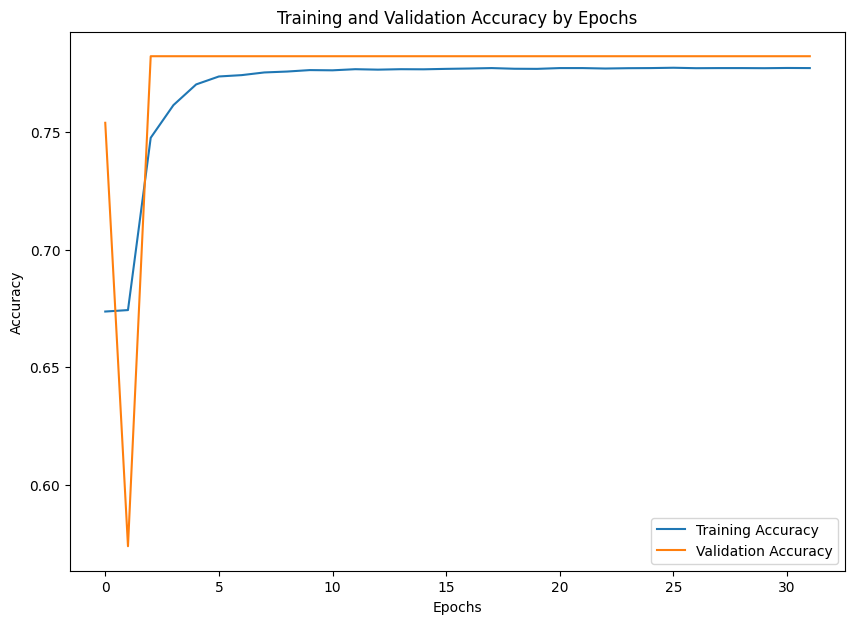

In [10]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Epochs')
plt.legend()
plt.show();

In [11]:
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

282/282 [==============================] - 0s 947us/step - loss: 0.5240 - accuracy: 0.7823
accuracy: 78.23333144187927


<h2> Neural Network Classfication after PCA </h2>

In [12]:
# Retaining 12 principal components as selected earlier
pca = PCA(n_components=12)
pca.fit_transform(X_p_std)
P = pca.components_
X_pca = np.dot(X_perturbed, P.T)

In [13]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=1992)


model = keras.Sequential([
    layers.Dense(256, activation='relu',input_shape=[X_train_pca.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_pca, y_train_pca, validation_data=(X_test_pca, y_test_pca), epochs=100, batch_size=64, callbacks=[early_stop], verbose=1)

Epoch 1/100
329/329 [==============================] - 2s 2ms/step - loss: 799.8810 - accuracy: 0.6784 - val_loss: 0.8676 - val_accuracy: 0.7483
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 13.0903 - accuracy: 0.6657 - val_loss: 0.6659 - val_accuracy: 0.7823
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 3.7716 - accuracy: 0.7511 - val_loss: 0.5875 - val_accuracy: 0.7823
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 1.8687 - accuracy: 0.7644 - val_loss: 0.5509 - val_accuracy: 0.7823
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 1.5927 - accuracy: 0.7698 - val_loss: 0.5354 - val_accuracy: 0.7823
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 1.3950 - accuracy: 0.7728 - val_loss: 0.5287 - val_accuracy: 0.7823
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 1.0320 - accuracy: 0.7735 - val_loss: 0.5468 - val_accuracy: 0.7

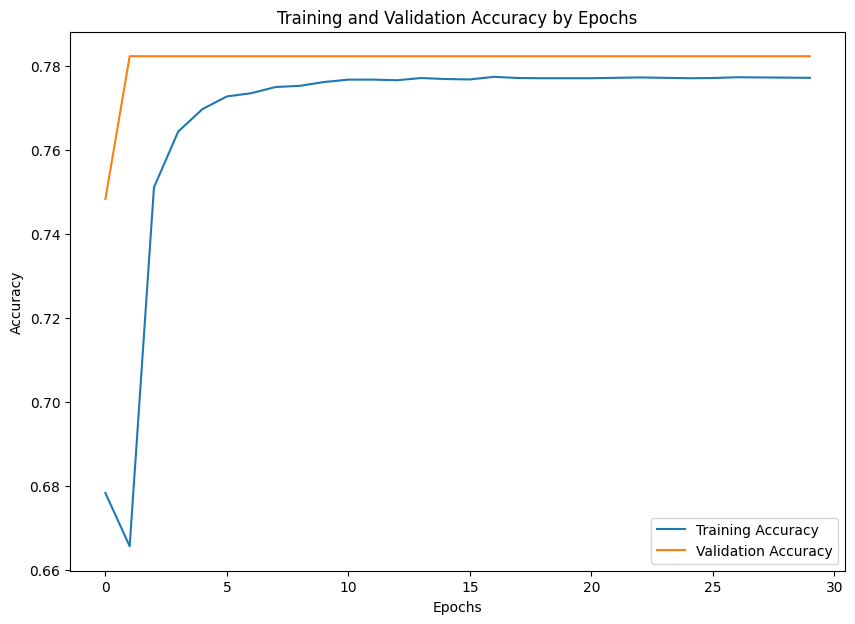

In [14]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Epochs')
plt.legend()
plt.show();

In [15]:
scores = model.evaluate(X_test_pca, y_test_pca)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

282/282 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.7823
accuracy: 78.23333144187927


<h2> Comments </h2>
It should also be noted that as it more uncommon for default to happen in real life, our dataset used could be slightly unbalanced. 
Only around 22% of our data is default data and hence, our predictions of credit card default might be biased to the proportion of default in the training dataset.
We can consider using weights when training our model or doing resampling to make our predictions more robust.

In the problems, we used the metric of accuracy to determine our results but in the real life scenario of credit card default cases, banks might be more interested
in other metrics as they are more interested in having less false negatives,i.e. reducing type 2 error.
Using accuracy could also explain why validation accuracy is higher than training accuracy which is not usual. 
Our model might be predicting less defaults due to imbalanced dataset which will give higher accuracy scores.


In [16]:
non_default = len(data[data['default payment next month']==0])
default = len(data[data['default payment next month']==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)


Default Ratio : 0.2212


It should also be noted that as it more uncommon for default to happen in real life, our dataset used could be slightly unbalanced. 
Only around 22% of our data is default data and hence, our predictions of credit card default might be biased to the proportion of default in the training dataset.
We can consider using weights when training our model or doing resampling to make our predictions more robust.

In the problems, we used the metric of accuracy to determine our results but in the real life scenario of credit card default cases, banks might be more interested
in other metrics as they are more interested in having less false negatives,i.e. reducing type 2 error.
Using accuracy could also explain why validation accuracy is higher than training accuracy which is not usual. 
Our model might be predicting less defaults due to imbalanced dataset which will give higher accuracy scores.

In [17]:
# Exploring without dropout layers

X_train, X_test, y_train, y_test = train_test_split(X_perturbed, y, test_size=0.30, random_state=1992)

from tensorflow import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping


model = keras.Sequential([
    layers.Dense(128, activation='relu',input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[early_stop], verbose=1)

Epoch 1/100
329/329 [==============================] - 1s 2ms/step - loss: 438.1126 - accuracy: 0.6920 - val_loss: 122.3340 - val_accuracy: 0.7156
Epoch 2/100
329/329 [==============================] - 0s 1ms/step - loss: 269.0228 - accuracy: 0.6927 - val_loss: 2030.1584 - val_accuracy: 0.2323
Epoch 3/100
329/329 [==============================] - 0s 1ms/step - loss: 293.7437 - accuracy: 0.6949 - val_loss: 854.9665 - val_accuracy: 0.2669
Epoch 4/100
329/329 [==============================] - 0s 1ms/step - loss: 185.6978 - accuracy: 0.6958 - val_loss: 346.8346 - val_accuracy: 0.7809
Epoch 5/100
329/329 [==============================] - 0s 1ms/step - loss: 154.6208 - accuracy: 0.6964 - val_loss: 137.6388 - val_accuracy: 0.7067
Epoch 6/100
329/329 [==============================] - 0s 1ms/step - loss: 142.3568 - accuracy: 0.6992 - val_loss: 64.2147 - val_accuracy: 0.7576
Epoch 7/100
329/329 [==============================] - 0s 2ms/step - loss: 113.5916 - accuracy: 0.6984 - val_loss: 305

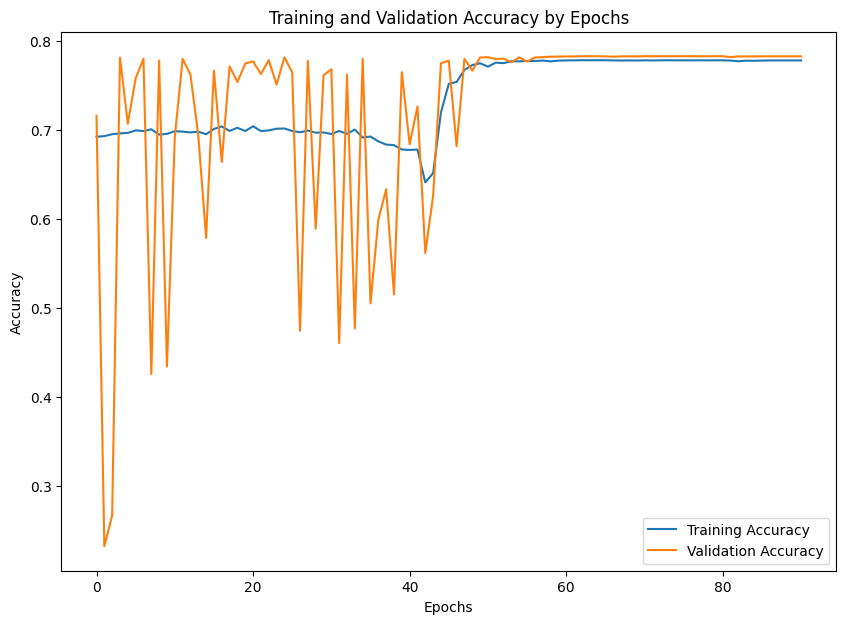

282/282 [==============================] - 0s 1ms/step - loss: 0.9344 - accuracy: 0.7823
accuracy: 78.23333144187927


In [18]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Epochs')
plt.legend()
plt.show();

scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

After removing the dropout layers in the model, we see that accuracy still remains the same. However, validation accuracy is flunctuating a lot. 
This might indicate overfitting since we did not use dropout layers. 
Interesting that validation accuracy is still higher than training accuracy, this might be really because of the unbalanced dataset
which gives high accuracy if predictions are mostly classfied as not default.